<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2022/3

### CS6462 Etivity 3 - Causal Graphical Model vs Bayesian Graphical Model

### Instructor: Emil Vassev
April 10th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Akshata </span>
### Student Surname: <span style="color:red">Bheemasamudra Mallikarjunappa </span>
### Student ID: <span style="color:red">23164204</span>
### Date of Final Submission: <span style="color:red">25/04/24</span>
***

## Task
In this e-tivity, you are asked to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. Then you are asked to build the same model but as a Bayesian Network by using the <b>BayesianNetwork</b> construct of the <b>pgmpy.models</b> library. Both models need to cover a real-life scenario targeting getting late at work.

## The real-life scenario

Here, you can find a set of random variables X = {X1, X2, ... , X12}:
<li>X1 = “late for work”</li>
<li>X2 = “low speed due to long vehicle queues”</li>
<li>X3 = “traffic jam”</li>
<li>X4 = “traffic accident”</li>
<li>X5 = “heavy rain”</li>
<li>X6 = “snow”</li>
<li>X7 = “slippery road”</li>
<li>X8 = “getting up late”</li>
<li>X9 = “road is blocked”</li>
<li>X10 = “taking a longer alternative route”</li>
<li>X11 = “car malfunction”</li>
<li>X12 = “car towing”</li>

Use your logic to build a <b>realistic</b> causal network, which then can be transformed to a Bayesian Network (Causal Bayesian Network). In this network, the parent-child relationships should be deduced based on your logic. You need to use all the random variables.
    
### Here are the steps you need to follow:

## Step 1: Create and Execute the Causal Network (50%)

### Step 1.1. Describe your logic of deducing the causal relationships. (10%)
Outline the problem in terms of:
<li>causal dependencies among the random variables</li> - Here, the evidence is X1 random variable which is being late for work. However, there are various causes (random variables X2 -X12) for a person being late for work. The logic deduced here contains four edges of causes that lead to X1. The first edge is due to variables X6 leading to X7 leading to X2. The second edge is a direct cause which is X8. The third edge is X11 leading to X12 -> X9 -> X10 which causes X1. The fourth edge caused by X3 has two independedn variables X4 and X5.  Therefore, taking a longer alternative route, low speed due to long vehicle queues, traffic jam and getting up late are the main causes of getting late to work. However these cause in turn have other causes as mentioned above.
<li>short rationale on the parent-child relationships</li>The first parent-child relationship is X1 is the child which has 4 parent nodes (X2, X8, X3, X10)
 whereas in turn we have X4 & X5 being the parent and X3 is the child and similarly for the other nodes.

### Step 1.2: Create and show the Causal DAG (30%)

In [ ]:
!pip install causalgraphicalmodels

In [ ]:
# installing causal graphical model library
from causalgraphicalmodels import CausalGraphicalModel

In [ ]:
# defining the random variables for each nodes
X1 = 'late for work'
X2 = 'low speed due to long vehicle queues'
X3 = 'traffic jam'
X4 = 'traffic accident'
X5 = 'heavy rain'
X6 = 'snow'
X7 = 'slippery road'
X8 = 'getting up late'
X9 = 'road is blocked'
X10 ='taking a longer alternative route'
X11 ='car malfunction'
X12 ='car towing'

In [ ]:
# creating the causal graphical model by defining the edges and nodes
late_to_work = CausalGraphicalModel(nodes = [X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12], edges = [(X8,X1),(X6,X7),(X7,X2),(X2,X1),(X5,X4),(X4,X3),(X3,X1),(X11,X12),(X12,X9),(X9,X10),(X10,X1)])

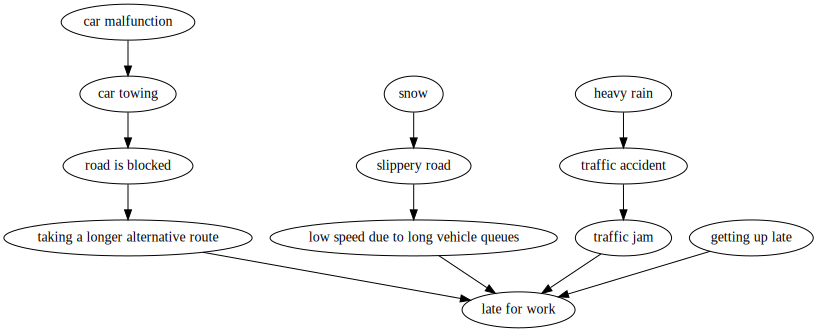

In [ ]:
late_to_work.draw()

### Step 1.3: Show the Joint Distibution of the Causal Network (1%)

In [ ]:
print(late_to_work.get_distribution())

P(heavy rain)P(snow)P(getting up late)P(car malfunction)P(traffic accident|heavy rain)P(slippery road|snow)P(car towing|car malfunction)P(traffic jam|traffic accident)P(low speed due to long vehicle queues|slippery road)P(road is blocked|car towing)P(taking a longer alternative route|road is blocked)P(late for work|getting up late,low speed due to long vehicle queues,traffic jam,taking a longer alternative route)


### Step 1.4: Run the intervention do(“road is blocked”) (7%)

In [ ]:
late_to_work_do = late_to_work.do(X9)

### Step 1.5: Show the Causal DAG with the intervention "on" (1%)

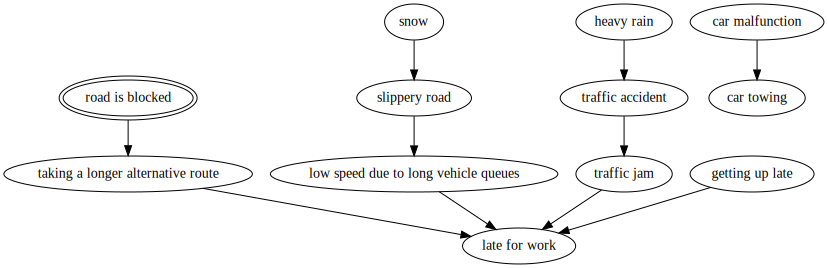

In [ ]:
late_to_work_do.draw()

### Step 1.6: Show the Joint Distibution of the Causal Network with the intervention "on" (1%)

In [ ]:
print(late_to_work_do.get_distribution())

P(getting up late)P(snow)P(car malfunction)P(heavy rain)P(slippery road|snow)P(car towing|car malfunction)P(taking a longer alternative route|do(road is blocked))P(traffic accident|heavy rain)P(low speed due to long vehicle queues|slippery road)P(traffic jam|traffic accident)P(late for work|low speed due to long vehicle queues,traffic jam,getting up late,taking a longer alternative route)


***
## Note
In <b>Step 2</b> you need to transform the model, you have built in Step 1, to a Bayesian Network. Here, you will need to repeat some of the activities you have already done in E-tivity 2. Please, consider all the random variables <b>X</b> binary and the probability distribution of each variable as <b>{true=50%, false=50%}</b>.
***

## Step 2: Create and Execute the Bayesian Network (50%)

### Step 2.1: Create and show the DAG of the Bayesian Network (20%)

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

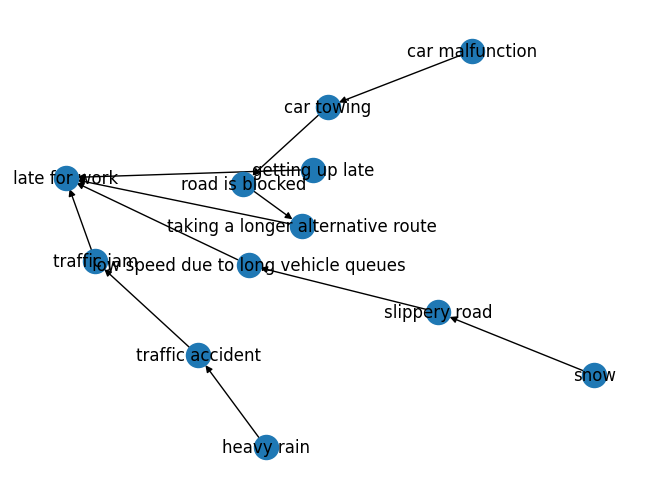

In [ ]:
model = BayesianNetwork([(X8,X1),(X6,X7),(X7,X2),(X2,X1),(X5,X4),(X4,X3),(X3,X1),(X11,X12),(X12,X9),(X9,X10),(X10,X1)])

nx_graph = nx.DiGraph()
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

nx.draw(nx_graph, with_labels=True)
plt.show()

### Step 2.2: Create the Conditional Probability Distributions of the Bayesian Network (20%)

#### Step 2.2.1: Build the probability distribution tables with TabularCPD (16%)

In [ ]:
# X1 = 'late for work'
# X2 = 'low speed due to long vehicle queues'
# X3 = 'traffic jam'
# X4 = 'traffic accident'
# X5 = 'heavy rain'
# X6 = 'snow'
# X7 = 'slippery road'
# X8 = 'getting up late'
# X9 = 'road is blocked'
# X10 ='taking a longer alternative route'
# X11 ='car malfunction'
# X12 ='car towing'

# define CPD for heavy rain
cpd_X5 = TabularCPD (
    variable=X5,
    variable_card=2,
    values=[[0.5], [0.5]]

)

# define CPD for traffic accident
cpd_X4 = TabularCPD (
    variable=X4,
    variable_card=2,
    values=[[0.5,0.5],
            [0.5,0.5]],
    evidence=[X5],
    evidence_card=[2]
)

# define CPD for traffic jam
cpd_X3 = TabularCPD (
    variable=X3,
    variable_card=2,
    values=[[0.5,0.5],
            [0.5,0.5]],
    evidence=[X4],
    evidence_card=[2]
)

# define CPD for snow
cpd_X6 = TabularCPD (
    variable=X6,
    variable_card=2,
    values=[[0.5], [0.5]]
)

# define CPD for slippery road
cpd_X7 = TabularCPD (
    variable=X7,
    variable_card=2,
    values=[[0.5,0.5],
            [0.5,0.5]],
    evidence=[X6],
    evidence_card=[2]

)

# define CPD for low speed due to long vehicle queues
cpd_X2 = TabularCPD (
    variable= X2,
    variable_card=2,
   values=[[0.5,0.5],
            [0.5,0.5]],
     evidence=[X7],
    evidence_card=[2]
)


# define CPD for car malfunction
cpd_X11 = TabularCPD (
    variable=X11,
    variable_card=2,
    values=[[0.5], [0.5]]
)

# define CPD for car towing
cpd_X12 = TabularCPD (
    variable=X12,
    variable_card=2,
   values=[[0.5,0.5],
            [0.5,0.5]],
     evidence=[X11],
    evidence_card=[2]
)

# define CPD for road is blocked
cpd_X9 = TabularCPD (
    variable=X9,
    variable_card=2,
    values=[[0.5,0.5],
            [0.5,0.5]],
     evidence=[X12],
    evidence_card=[2]
)

# define CPD for taking a longer alternative route
cpd_X10 = TabularCPD (
    variable=X10,
    variable_card=2,
    values=[[0.5,0.5],
            [0.5,0.5]],
     evidence=[X9],
    evidence_card=[2]
)

# define CPD for getting up late
cpd_X8 = TabularCPD (
    variable=X8,
    variable_card=2,
    values=[[0.5], [0.5]]
)

# define CPD for late for work
cpd_X1 = TabularCPD (
    variable=X1,
    variable_card=2,
    values=[[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
            [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]],
    # define the evidences - one of the causes must be true
    evidence=[X8,X3,X2,X10],
    evidence_card=[2,2,2,2]
)

#### Step 2.2.2: Associate the distribution models with the network structure (2%)

In [ ]:
# we associate the distribution models with the network structure, i.e., with the random variables
model.add_cpds(cpd_X1,cpd_X2,cpd_X3,cpd_X4,cpd_X5,cpd_X6,cpd_X7,cpd_X8,cpd_X9,cpd_X10,cpd_X11,cpd_X12)

#### Step 2.2.3: Check the model (2%)

In [ ]:
model.check_model()

True

### Step 2.3: Infer Posterior Probability of “road is blocked” considering "late for work" as evidence. (10%)

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [ ]:
posterior_p = infer.query([X9], evidence={X1: 0})

In [ ]:
print(posterior_p)

+--------------------+------------------------+
| road is blocked    |   phi(road is blocked) |
+====================+========================+
| road is blocked(0) |                 0.5000 |
+--------------------+------------------------+
| road is blocked(1) |                 0.5000 |
+--------------------+------------------------+
